In [144]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

import os
import numpy as np
import matplotlib.pyplot as plt

In [145]:
# !wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip
# !unzip cats_and_dogs.zip

In [167]:
# !tree

In [147]:
# !mkdir cats_and_dogs/test/test_images

In [148]:
# !mv cats_and_dogs/test/*.jpg cats_and_dogs/test/test_images

In [149]:
# !rm cats_and_dogs.zip

In [150]:
# Path and directory for data
PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Variables for pre-processing
batch_size = 128
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [151]:
# Get data preprocessed from directories
train_image_generator = ImageDataGenerator(rescale = 1/255,
                                           rotation_range = 20,
                                           width_shift_range=0.2,
                                           height_shift_range=0.2,
                                           shear_range=0.2,
                                           zoom_range=0.2,
                                           horizontal_flip=True,
                                           fill_mode = "reflect")

validation_image_generator = ImageDataGenerator(rescale=1/255)

test_image_generator = ImageDataGenerator(rescale=1/255)

train_data_gen = train_image_generator.flow_from_directory(
    train_dir,
    target_size = (IMG_HEIGHT, IMG_WIDTH),
    batch_size = batch_size,
    class_mode = "binary")

val_data_gen = validation_image_generator.flow_from_directory(
    validation_dir,
    target_size = (IMG_HEIGHT, IMG_WIDTH),
    batch_size = batch_size,
    class_mode = "binary")

test_data_gen = test_image_generator.flow_from_directory(
    test_dir,
    target_size = (IMG_HEIGHT, IMG_WIDTH),
    batch_size = 50,
    class_mode = None,
    shuffle = False)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


In [152]:
# Take samples from training data
training_sample_images, training_sample_labels = next(train_data_gen)

In [166]:
# Create a function to plot images and their labels
def imageplotting(images, labels):
    fig, axs = plt.subplots(len(images), 1, figsize = (7,len(images) * 3))

    for image, label, ax in zip(images, labels, axs):
        ax.imshow(image)
        ax.set_title(f"This image is a {'dog' if label == 1.0 else 'cat'}")
        ax.set_axis_off()
    plt.show()

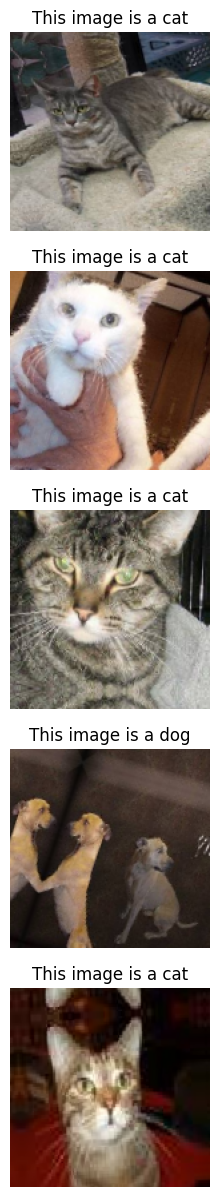

In [154]:
# Plot samples
imageplotting(training_sample_images[:5], training_sample_labels[:5])

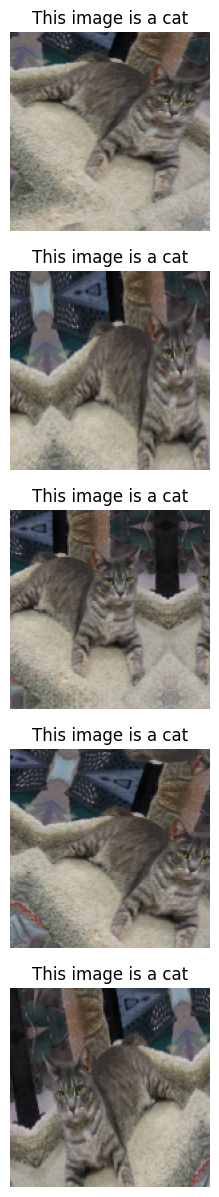

In [155]:
# See data augmentation outputs
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
augmented_images_labels = [train_data_gen[0][1][0] for i in range(5)]

imageplotting(augmented_images, augmented_images_labels)

In [208]:
# Building model 
model = Sequential()

model.add(Conv2D(32, (3,3), activation = "relu", padding = "same", input_shape = train_data_gen.image_shape))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3,3), activation = "relu", padding = "same"))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3,3), activation = "relu", padding = "same"))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation = "sigmoid"))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 75, 75, 32)        0         
 ng2D)                                                           
                                                                 
 dropout (Dropout)           (None, 75, 75, 32)        0         
                                                                 
 conv2d_18 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 37, 37, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_1 (Dropout)         (None, 37, 37, 64)       

In [209]:
# Set training variables
STEPS_PER_EPOCH = train_data_gen.n // train_data_gen.batch_size
VALIDATION_STEPS = val_data_gen.n // val_data_gen.batch_size
VALIDATION_STEPS, STEPS_PER_EPOCH

(7, 15)

In [210]:
# Create early stopping to avoid too much useless epochs
es = EarlyStopping(patience=3, restore_best_weights=True)

In [211]:
# Training model
history = model.fit(x = train_data_gen,
                    batch_size = batch_size,
                    epochs = 100,
                    validation_data = val_data_gen,
                    steps_per_epoch = STEPS_PER_EPOCH,
                    validation_steps = VALIDATION_STEPS,
                    callbacks = [es])

Epoch 1/100
15/15 [==============================] - 75s 5s/step - loss: 0.9360 - accuracy: 0.5123 - val_loss: 0.6945 - val_accuracy: 0.5011
Epoch 2/100
15/15 [==============================] - 90s 6s/step - loss: 0.6937 - accuracy: 0.5155 - val_loss: 0.6917 - val_accuracy: 0.5089
Epoch 3/100
15/15 [==============================] - 88s 6s/step - loss: 0.6910 - accuracy: 0.5283 - val_loss: 0.6930 - val_accuracy: 0.5056
Epoch 4/100
15/15 [==============================] - 101s 7s/step - loss: 0.6943 - accuracy: 0.4995 - val_loss: 0.6916 - val_accuracy: 0.5647
Epoch 5/100
15/15 [==============================] - 94s 6s/step - loss: 0.6935 - accuracy: 0.5000 - val_loss: 0.6927 - val_accuracy: 0.4989
Epoch 6/100
15/15 [==============================] - 78s 5s/step - loss: 0.6911 - accuracy: 0.5333 - val_loss: 0.6861 - val_accuracy: 0.5569
Epoch 7/100
15/15 [==============================] - 83s 5s/step - loss: 0.6924 - accuracy: 0.5385 - val_loss: 0.6901 - val_accuracy: 0.5268
Epoch 8/100


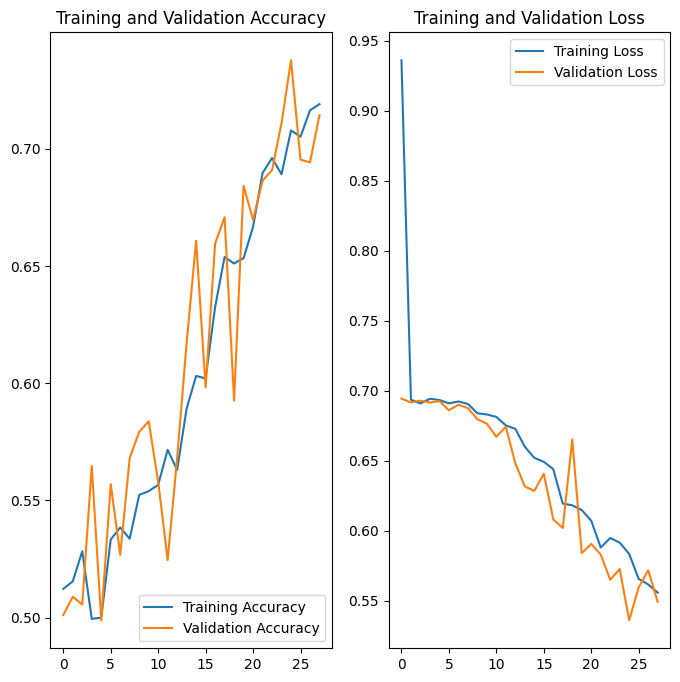

In [213]:
# Plot learning curves
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(28)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [215]:
# Make predictions
y_pred = model.predict(test_data_gen)

1/1 [==============================] - 0s 493ms/step


In [216]:
# Function to encode predictions
def encodingpredictions(array):
    lst = array.flatten().tolist()
    labels = []
    for prediction in lst:
        if prediction >= 0.5:
            labels.append(1)
        else:
            labels.append(0)
    
    return labels

In [217]:
# Get test images arrays
test_images = next(test_data_gen)

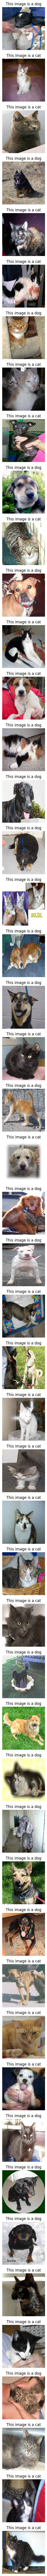

In [218]:
# Plot model's predictions
imageplotting(test_images, encodingpredictions(y_pred))

In [219]:
real_dir = os.path.join(PATH, "real_data")

In [220]:
real_data_image_generator = ImageDataGenerator(rescale=1/255)
real_data_gen = real_data_image_generator.flow_from_directory(
    real_dir,
    target_size = (IMG_HEIGHT, IMG_WIDTH),
    batch_size = 7,
    class_mode = None,
    shuffle = False)

Found 7 images belonging to 1 classes.


In [221]:
real_data_pred = model.predict(real_data_gen)
real_data_pred

1/1 [==============================] - 1s 964ms/step


array([[0.5881665 ],
       [0.9716143 ],
       [0.9020063 ],
       [0.56034327],
       [0.6641149 ],
       [0.344964  ],
       [0.4137193 ]], dtype=float32)

In [222]:
real_images = next(real_data_gen)

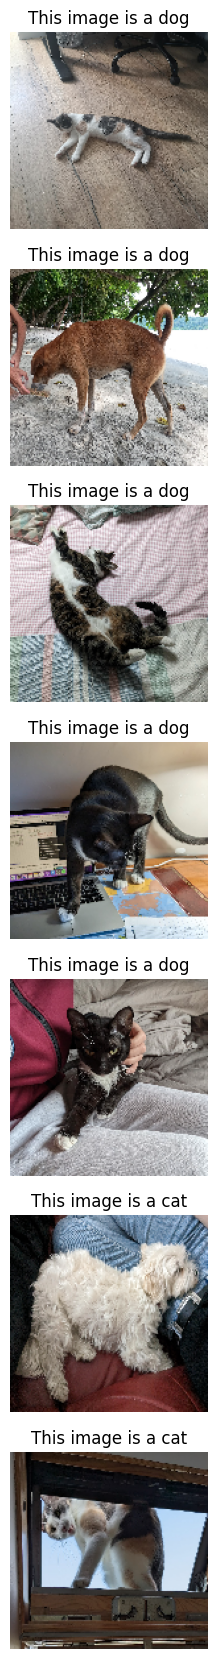

In [223]:
imageplotting(real_images, encodingpredictions(real_data_pred))